# Topics and descriptions

In [1]:
# Import the libraries we need
import pandas as pd
import altair as alt
from altair import datum
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
from IPython.display import display, HTML
alt.renderers.enable('notebook')

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


RendererRegistry.enable('notebook')

In [2]:
# Load the CSV file from GitHub.
# This puts the data in a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/wragge/dxlab-tribune/master/negatives/csv/all_items.csv')

## Words in topics

In [13]:
# Make one big string with all the topics in it
topic_words = df['topics'].str.replace('|', ' ').str.cat(sep=' ')

In [14]:
# View the results
topic_words

"motorcycles motorcyclists artists trade union officials wharf labourers boilermakers wharf labourers bowling alleys stadiums trade union officials trade unionists meetings soccer teams soccer players crowds receptions women musicians demonstrations posters & placards airports bookshops performers houses children city & town streets portraits Aboriginal peoples (Australians) Aboriginal reserves bus drivers returned servicepeople banners demonstrations sailors warships boats trade unionists meetings window displays toys trade unions wharf labourers demonstrations theatres & cinemas trade union officials trade unions fishing boats performers musicians feminists Christmas cakes dinners festivals, celebrations etc. meetings elections astronomers stalls interiors conventions meetings posters & placards pensioners earthmoving equipment trade unionists trade union officials crowds meetings trade unions posters & placards workers petitions Tongans conventions houses residential streets ships a

(-0.5, 1199.5, 799.5, -0.5)

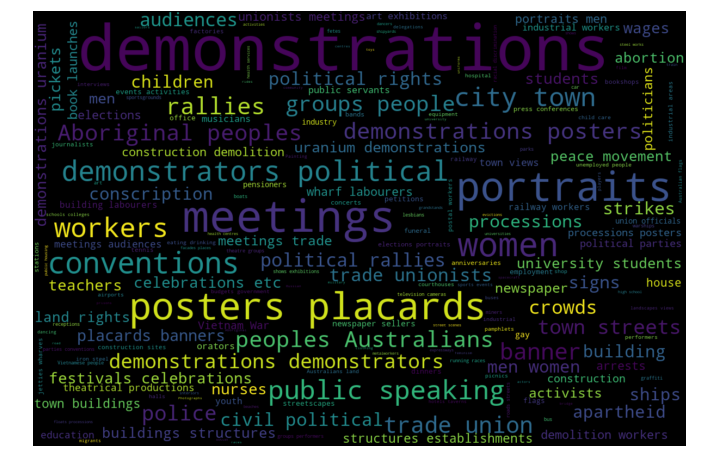

In [17]:
# Make a word cloud!
# The word cloud software splits the string into individual words and calculates their frquency
wordcloud = WordCloud(width=1200, height=800).generate(topic_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [19]:
# TextBlob is useful for analysing large amounts of text
# It automatically tokenises strings (splits them into individual words)
# You can then explore things like the word frequency
# See: https://textblob.readthedocs.io/en/dev/

blob = TextBlob(topic_words)
# Get a list of words and their frquencies
words = [[word, count] for word, count in blob.lower().word_counts.items() if word not in stopwords]
# Put words and frequencies into a DataFrame
word_counts = pd.DataFrame(words).rename({0: 'word', 1: 'count'}, axis=1).sort_values(by='count', ascending=False)
# Display the top 25 words
word_counts[:25].style.format({'count': '{:,}'}).bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'})

,word,count
21,demonstrations,926
13,meetings,349
32,portraits,273
129,political,244
22,posters,223
23,placards,207
19,women,198
67,workers,176
63,conventions,133
194,people,131


In [22]:
# Save the word counts as a new CSV file
word_counts.to_csv('data/topic_word_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/topic_word_counts.csv">Download CSV</a>'))

## Try with descriptions

The original notebook created a word cloud from the description field, but you could also use TextBlob. This would give some data to compare between the structured descriptions in 'topics' and the free text descriptions.

In [28]:
# Turn all the descriptions into one big string
descriptions = df['description'].str.replace('|', ' ').str.cat(sep=' ')

In [40]:
stopwords = nltk.corpus.stopwords.words('english')
# words we want to exclude
stopwords = stopwords + ['image', 'descriptions', 'description', 'provided', 'cataloguer', 'negative', 'sleeve', 'titled', 'original', 'include', 'includes', 'row', 'rows']

blob = TextBlob(descriptions)
# Get a list of words and their frquencies
words = [[word, count] for word, count in blob.lower().word_counts.items() if word not in stopwords]
# Put words and frequencies into a DataFrame
word_counts = pd.DataFrame(words).rename({0: 'word', 1: 'count'}, axis=1).sort_values(by='count', ascending=False)
# Display the top 25 words
word_counts[:25].style.format({'count': '{:,}'}).bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'})

,word,count
102,sydney,"1,119"
161,demonstration,821
75,march,640
526,may,526
105,meeting,494
233,unidentified,404
604,august,392
509,july,363
868,october,345
53,day,342


In [41]:
# Save the word counts as a new CSV file
word_counts.to_csv('data/description_word_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/description_word_counts.csv">Download CSV</a>'))

### Noun phrases

In [39]:
# TextBlob also extracts noun phrases -- these might be more useful than individual words?
# Note that running this can be quite slow...
# Get a list of nouns and their frquencies
nps = [[word, count] for word, count in blob.np_counts.items() if word not in stopwords]
# Put words and frequencies into a DataFrame
np_counts = pd.DataFrame(nps).rename({0: 'word', 1: 'count'}, axis=1).sort_values(by='count', ascending=False)
# Display the top 25 words
np_counts[:50].style.format({'count': '{:,}'}).bar(subset=['count'], color='#d65f5f').set_properties(subset=['count'], **{'width': '300px'})

,word,count
47,sydney,989
0,negative sleeve,870
303,may,398
37,march,396
353,august,387
290,july,354
532,october,338
518,september,330
139,june,309
78,april,298


In [42]:
# Save the word counts as a new CSV file
np_counts.to_csv('data/description_np_counts.csv', index=False)
display(HTML('<a target="_blank" href="data/description_np_counts.csv">Download CSV</a>'))